<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/deep_learning--keras/blob/master/DLP3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

In [3]:
(train_data,train_label), (test_data,test_label) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
#Decoding integer list into original sequence of words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [11]:
#Preparing data for feeding into neural networks
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [8]:
#to one-hot encode the labels
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)

In [9]:
#Model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [10]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
#Validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
#fitting the data to the model
history = model.fit(x = partial_x_train, y = partial_y_train, batch_size = 512, epochs = 20, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 16s 88ms/step - loss: 3.0766 - accuracy: 0.3441 - val_loss: 1.7231 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4858 - accuracy: 0.6880 - val_loss: 1.3081 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.1206 - accuracy: 0.7654 - val_loss: 1.1251 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8547 - accuracy: 0.8135 - val_loss: 1.0096 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6536 - accuracy: 0.8660 - val_loss: 0.9470 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5169 - accuracy: 0.8915 - val_loss: 0.9101 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4220 - accuracy: 0.9134 - val_loss: 0.8902 - val_accuracy: 0.8250
Epoch 8/20
1

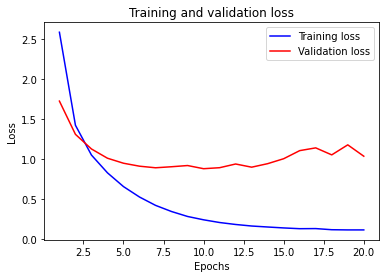

In [15]:
#Validation set performance visualization
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

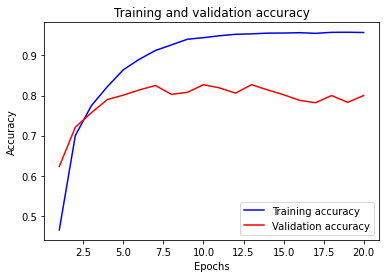

In [16]:
accuracy_values = history_dict['accuracy']
validation_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, 'b', label = 'Training accuracy')
plt.plot(epochs, validation_accuracy_values, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
#With just 4 epochs, to prevent overfitting
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512,validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 0.1067 - accuracy: 0.9567 - val_loss: 1.0818 - val_accuracy: 0.8060
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 0.1066 - accuracy: 0.9569 - val_loss: 1.0962 - val_accuracy: 0.8010
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 0.1061 - accuracy: 0.9580 - val_loss: 1.1758 - val_accuracy: 0.7890
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.1027 - accuracy: 0.9569 - val_loss: 1.2026 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.1046 - accuracy: 0.9579 - val_loss: 1.1495 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.1003 - accuracy: 0.9590 - val_loss: 1.1658 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0998 - accuracy: 0.9565 - val_loss: 1.1982 - val_accuracy: 0.7880
Epoch 8/9
16/16 [===

In [24]:
#prediction
prediction = model.predict(x_test)

np.argmax(prediction[50])

20

In [ ]:
#integer encoding of labels
'''y_train = np.array(train_label)
y_test = np.array(test_label)
model.compile(optimizer='rmsprop', loss = 'sparse_categorical_cross_entropy',metrics = ['accuracy'])'''